In [1]:
import matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import pandas as pd
import csv
import plotly.express as px
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 12

def cart2sph(x, y, z):
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    el = np.arctan2(z, hxy)
    az = np.arctan2(y, x)
    return az, el, r

def sph2cart(az, el, r):
    rcos_theta = r * np.cos(el)
    x = rcos_theta * np.cos(az)
    y = rcos_theta * np.sin(az)
    z = r * np.sin(el)
    return x, y, z

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

def eh2kjmol(arr):
    return(np.multiply(arr,2625.5))

def e2logk(er, et, k=1, T=298.15):
    kb = 1.38064852e-23
    R = 8.3144621
    h = 6.62607004e-34
    return(round(np.log10(np.multiply(((k*kb*T)/h), np.exp((-(et-er)*1000)/(R*T)))),3))

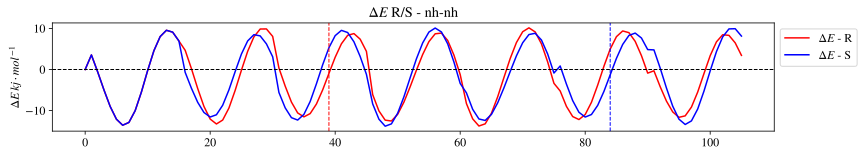

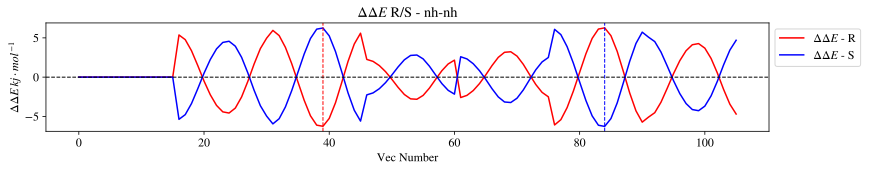

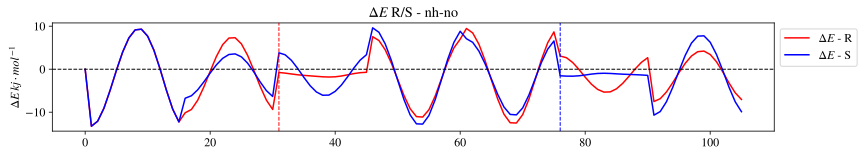

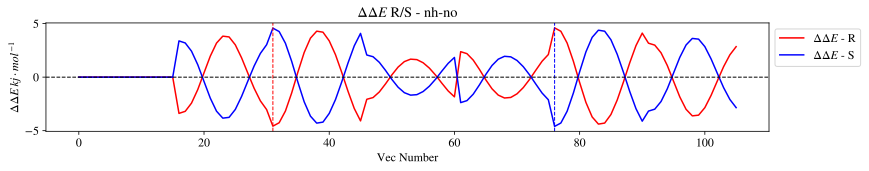

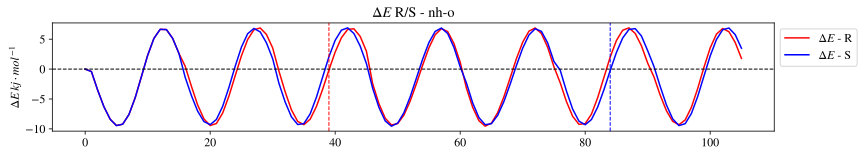

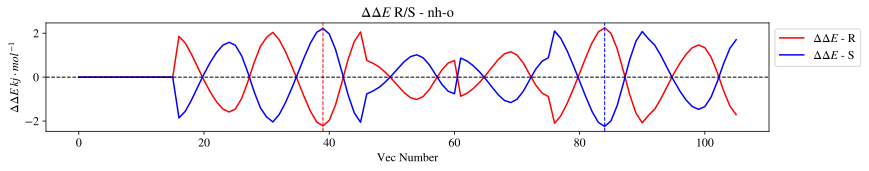

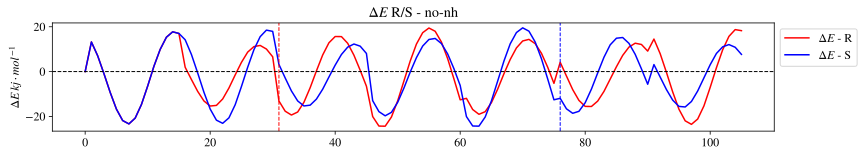

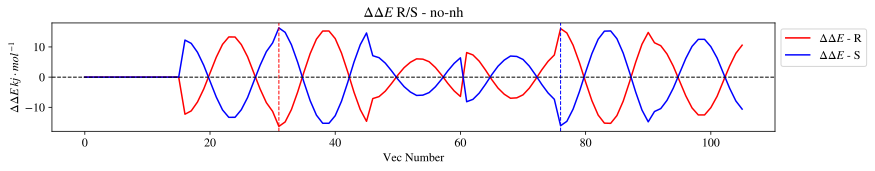

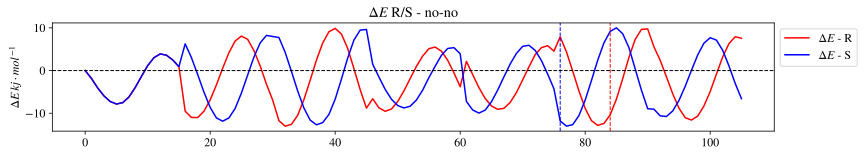

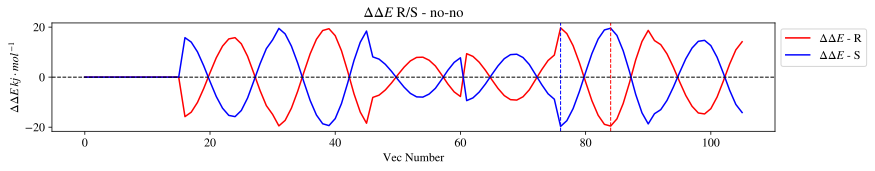

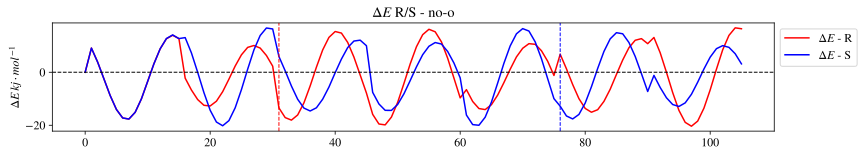

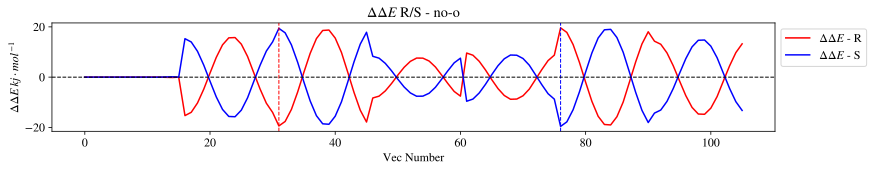

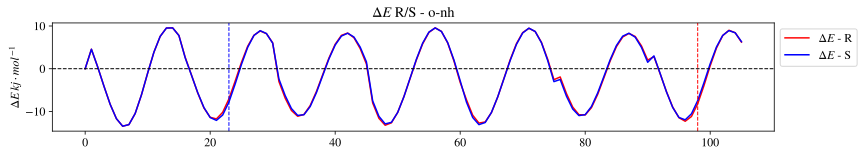

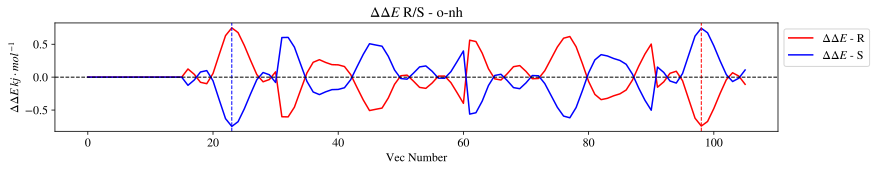

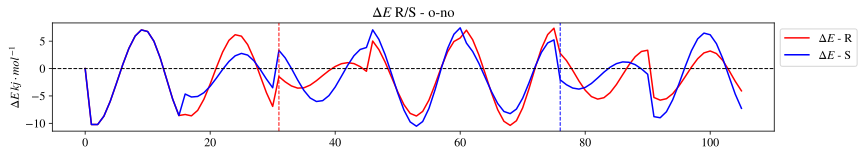

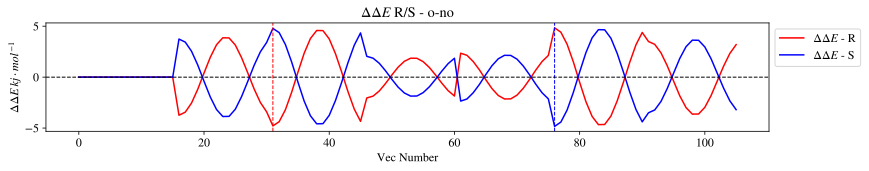

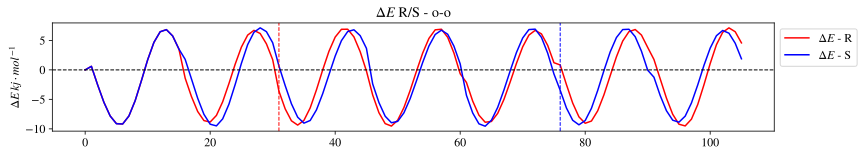

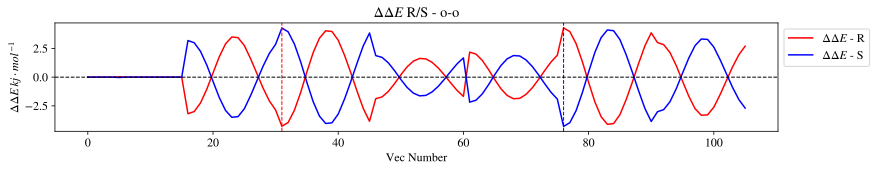

nh-nh - 84: [0.000330312562, -0.000404323865, 0.00187329563]
nh-no - 76: [-0.000337691941, 4.13553354e-20, -0.00191514616]
nh-o - 84: [0.000330312562, -0.000404323865, 0.00187329563]
no-nh - 76: [-0.000337691941, 4.13553354e-20, -0.00191514616]
no-no - 76: [-0.000337691941, 4.13553354e-20, -0.00191514616]
no-o - 76: [-0.000337691941, 4.13553354e-20, -0.00191514616]
o-nh - 23: [-0.00117110771, 0.000404323865, -0.00149894951]
o-no - 76: [-0.000337691941, 4.13553354e-20, -0.00191514616]
o-o - 76: [-0.000337691941, 4.13553354e-20, -0.00191514616]


In [2]:

analysis = {}

rcsvs = []
scsvs = []
printlist = []
r_es = []
s_es = []
r_76 = []
s_76 = []
names = []

fgroups = ["nh", "no", "o"]
for k in fgroups:
    for l in fgroups:
        name = k + "-" + l
        if  name != "o-o":
            rcsv = "data/derivs/r-na1t-{}-1/efield_perturbation.csv".format(name)
            scsv = "data/derivs/s-na1t-{}-1/efield_perturbation.csv".format(name)
        else:
            rcsv = "data/rxn-traj/na1t-r-scan-1/efield_perturbation.csv"
            scsv = "data/rxn-traj/na1t-s-scan-1/efield_perturbation.csv"
        data = pd.DataFrame(columns=["vecx", "vecy", "vecz", "er", "es"])

        vec = []
        er = []
        es = []
        with open(rcsv, "r") as f:
                reader = csv.reader(f)
                for i in reader:
                    if i[0] != "x":
                        vec += [[float(i[0]), float(i[1]), float(i[2])]]
                        er += [float(i[3])]


        with open(scsv, "r") as f:
                reader = csv.reader(f)
                for i in reader:
                    if i[0] != "x":
                        es += [float(i[3])]


        # zeroes = len(es) - len(er)
        # for i in range(zeroes):
        #     er += [0.0]



        for i in range(len(vec)):
            az, el, r = cart2sph(vec[i][0], vec[i][1], vec[i][2])
            x, y, z = sph2cart(az, el, -r)
            try:
                data = data.append({"vecx": x, "vecy": y, "vecz": z, "er": er[i], "es": es[i]}, ignore_index=True)
            except:
                pass


        data['deltar'] = np.subtract(data['er'], data['es'])
        data['deltas'] = np.subtract(data['es'], data['er'])
        data['delta'] = np.absolute(np.subtract(data['es'], data['er']))
        rbest = min(list(data.deltar))
        sbest = min(list(data.deltas))
        # best = max(list(data.delta))
        rbestindex = data.index[data['deltar'] == rbest]
        sbestindex = data.index[data['deltas'] == sbest]
        analysis[name] = [min(list(data.deltas))]


        x = list(range(0, len(data)))



        fig, ax = plt.subplots(1,1, figsize=(13,2))
        ax.plot(x, list(data.er), label="$\Delta E$ - R", color="r")
        ax.plot(x, list(data.es), label="$\Delta E$ - S", color="b")
        ax.axvline(rbestindex, linewidth=1, linestyle='--', color="r")
        ax.axvline(sbestindex, linewidth=1, linestyle='--', color="b")
        ax.axhline(0, linewidth=1, linestyle='--', color="k")
        ax.set_title(r"$\Delta E$ R/S - {}".format(name))
        ax.set_ylabel(r"$\Delta E \:kj\cdot mol^{-1}$")
        plt.legend(bbox_to_anchor=(1, 1))
        plt.show()


        fig, ax = plt.subplots(1,1, figsize=(13,2))
        ax.plot(x, list(data.deltar), label="$\Delta\Delta E$ - R", color="r")
        ax.plot(x, list(data.deltas), label="$\Delta\Delta E$ - S", color="b")
        ax.axvline(rbestindex, linewidth=1, linestyle='--', color="r")
        ax.axvline(sbestindex, linewidth=1, linestyle='--', color="b")
        ax.axhline(0, linewidth=1, linestyle='--', color="k")
        ax.set_title(r"$\Delta\Delta E$ R/S - {}".format(name))
        ax.set_xlabel("Vec Number")
        ax.set_ylabel(r"$\Delta \Delta E \:kj\cdot mol^{-1}$")
        plt.legend(bbox_to_anchor=(1, 1))
        plt.show()

        # fig = px.scatter_3d(data, x="vecx", z="vecy", y="vecz", color="delta")
        # fig.show()
        vecnum = int(sbestindex.to_list()[0])
        # print("Best S vec - #{} : {}, {}, {}".format(vecnum, list(data.vecx)[vecnum], list(data.vecy)[vecnum], list(data.vecz)[vecnum]))
        vecnum = int(rbestindex.to_list()[0])
        # print("Best R vec - #{} : {}, {}, {}".format(vecnum, list(data.vecx)[vecnum], list(data.vecy)[vecnum], list(data.vecz)[vecnum]))
        analysis[name] = analysis[name] + [(list(data.vecx)[vecnum], list(data.vecy)[vecnum], list(data.vecz)[vecnum]), (list(data.vecx)[vecnum], list(data.vecy)[vecnum], list(data.vecz)[vecnum])]
        
        printlist += [f'{name} - {sbestindex[0]}: {vec[int(sbestindex[0])]}']
        names += [name]
        r_es += [er[int(sbestindex[0])]]
        s_es += [es[int(sbestindex[0])]]
        r_76 += [er[76]]
        s_76 += [es[76]]
# for i in analysis.keys():
#     print("{}: {}".format(i, analysis[i][0]))

for i in printlist:
    print(i)

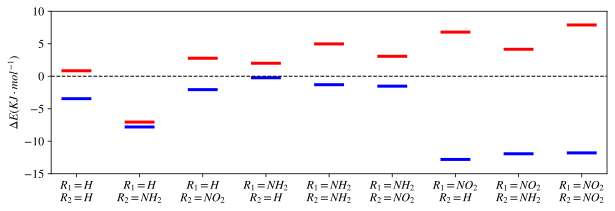

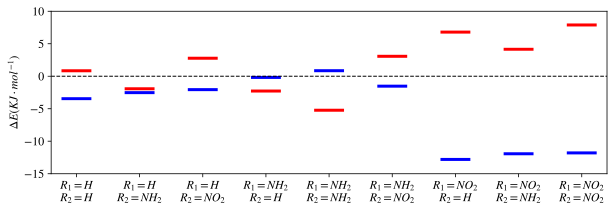

['$R_1=H$\n$R_2=H$', '$R_1=H$\n$R_2=NH_2$', '$R_1=H$\n$R_2=NO_2$', '$R_1=NH_2$\n$R_2=H$', '$R_1=NH_2$\n$R_2=NH_2$', '$R_1=NH_2$\n$R_2=NO_2$', '$R_1=NO_2$\n$R_2=H$', '$R_1=NO_2$\n$R_2=NH_2$', '$R_1=NO_2$\n$R_2=NO_2$']
[0.838709436110264, -1.9276266200100167, 2.771831325315702, -2.281252300556389, -5.228730517237693, 3.068094389481587, 6.793739213403455, 4.150427013784395, 7.892496976467555]
[-3.4523340326250036, -2.5195056995754044, -2.0641914486565156, -0.18156898277027267, 0.8553041858700112, -1.532216321409578, -12.807794375414915, -11.935385072577958, -11.799321307964647]
nh-nh: -6.271967081377056
nh-no: -4.600310710891165
nh-o: -2.243303456842682
no-nh: -16.085812086362353
no-no: -19.691818284432202
no-o: -19.60153358881837
o-nh: -0.7487846782333918
o-no: -4.836022773972218
o-o: -4.291043468735268


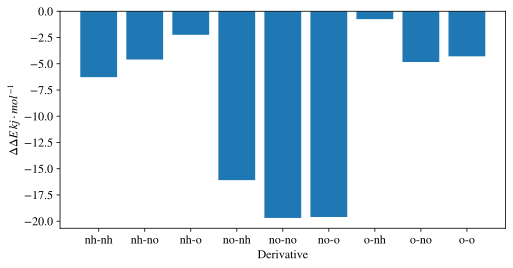

[-6.271967081377056, -4.600310710891165, -2.243303456842682, -16.085812086362353, -19.691818284432202, -19.60153358881837, -0.7487846782333918, -4.836022773972218, -4.291043468735268]


In [3]:
newnames = ["$R_1=H$\n$R_2=H$", "$R_1=H$\n$R_2=NH_2$", "$R_1=H$\n$R_2=NO_2$", "$R_1=NH_2$\n$R_2=H$", "$R_1=NH_2$\n$R_2=NH_2$", "$R_1=NH_2$\n$R_2=NO_2$", "$R_1=NO_2$\n$R_2=H$", "$R_1=NO_2$\n$R_2=NH_2$", "$R_1=NO_2$\n$R_2=NO_2$"]

r_es_new = [0, 0, 0, 0, 0, 0, 0, 0, 0]
s_es_new = [0, 0, 0, 0, 0, 0, 0, 0, 0]
r_76_new = [0, 0, 0, 0, 0, 0, 0, 0, 0]
s_76_new = [0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(len(names)):
    name = names[i]
    if name == 'o-o':
        index = 0
    if name == 'o-nh':
        index = 1
    if name == 'o-no':
        index = 2
    if name == 'nh-o':
        index = 3
    if name == 'nh-nh':
        index = 4
    if name == 'nh-no':
        index = 5
    if name == 'no-o':
        index = 6
    if name == 'no-nh':
        index = 7
    if name == 'no-no':
        index = 8

    r_es_new[index] = r_es[i]
    s_es_new[index] = s_es[i]
    r_76_new[index] = r_76[i]
    s_76_new[index] = s_76[i]


fig, ax = plt.subplots(1,1, figsize=(10,3))
ax.plot(newnames, r_es_new, marker='_', markersize='30', linestyle='', color='r', mew=3)
ax.plot(newnames, s_es_new, marker='_', markersize='30', linestyle='', color='b', mew=3)
ax.axhline(0, linewidth=1, linestyle='--', color="k")
ax.set_ylabel(r'$\Delta E (KJ\cdot mol^{-1})$')
# plt.legend()
ax.set_ylim(-15, 10)
plt.show()

fig, ax = plt.subplots(1,1, figsize=(10,3))
ax.plot(newnames, r_76_new, marker='_', markersize='30', linestyle='', color='r', mew=3)
ax.plot(newnames, s_76_new, marker='_', markersize='30', linestyle='', color='b', mew=3)
ax.axhline(0, linewidth=1, linestyle='--', color="k")
ax.set_ylabel(r'$\Delta E (KJ\cdot mol^{-1})$')
# plt.legend()
ax.set_ylim(-15, 10)
plt.show()
print(newnames)
print(r_76_new)
print(s_76_new)


y = []
x = []
for i in analysis.keys():
    y += [analysis[i][0]]
    x += [i]

for i in range(len(x)):
    print(f'{x[i]}: {y[i]}' )
fig, ax = plt.subplots(1,1, figsize=(8,4))
ax.bar(x, y)

# ax.set_title(r"Max $\Delta\Delta E$ R/S")
ax.set_xlabel("Derivative")
ax.set_ylabel(r"$\Delta \Delta E \:kj\cdot mol^{-1}$")
plt.show()
print(y)

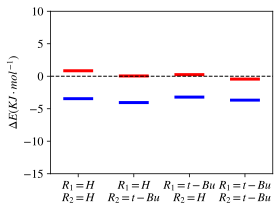

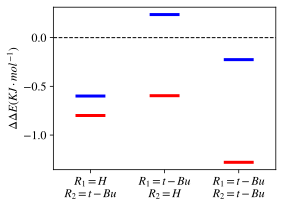

[-0.7991844  -0.59611599 -1.279612  ]


In [4]:
names = ["$R_1=H$\n$R_2=H$", "$R_1=H$\n$R_2=\it{t}-Bu$", "$R_1=\it{t}-Bu$\n$R_2=H$", "$R_1=\it{t}-Bu$\n$R_2=\it{t}-Bu$"]
s = [-3.4523340326250036, -4.051482694385982, -3.2155824944633764, -3.6780165732802175]
r = [0.838709436110264, 0.03952503862683443, 0.24259344610408107, -0.44090256848710396]
s2 = np.subtract(s[1:], s[0])
r2 = np.subtract(r[1:], r[0])

fig, ax = plt.subplots(1,1, figsize=(4,3))
ax.plot(names, r, marker='_', markersize='30', linestyle='', color='r', mew=3)
ax.plot(names, s, marker='_', markersize='30', linestyle='', color='b', mew=3)
ax.axhline(0, linewidth=1, linestyle='--', color="k")
ax.set_ylabel(r'$\Delta E (KJ\cdot mol^{-1})$')
# plt.legend()
ax.set_ylim(-15, 10)
ax.set_xlim(-0.5, 3.5)
plt.show()

fig, ax = plt.subplots(1,1, figsize=(4,3))
ax.plot(names[1:], r2, marker='_', markersize='30', linestyle='', color='r', mew=3)
ax.plot(names[1:], s2, marker='_', markersize='30', linestyle='', color='b', mew=3)
ax.axhline(0, linewidth=1, linestyle='--', color="k")
ax.set_ylabel(r'$\Delta\Delta E (KJ\cdot mol^{-1})$')
# plt.legend()
# ax.set_ylim(-15, 10)
ax.set_xlim(-0.5, 2.5)
plt.show()
print(r2)

[-709.096272450232, -709.095528297329, -709.097150274514, -709.096182829984, -709.095076540653, -709.097422726778, -709.096493536243, -709.096111318804, -709.097009495809]


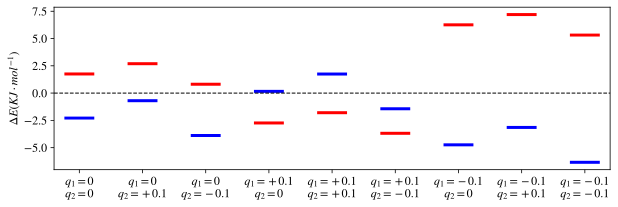

In [5]:
names = ["$q_1=0$\n$q_2=0$", "$q_1=0$\n$q_2=+0.1$", "$q_1=0$\n$q_2=-0.1$", "$q_1=+0.1$\n$q_2=0$", "$q_1=+0.1$\n$q_2=+0.1$", "$q_1=+0.1$\n$q_2=-0.1$", "$q_1=-0.1$\n$q_2=0$", "$q_1=-0.1$\n$q_2=+0.1$", "$q_1=-0.1$\n$q_2=-0.1$"]
# 1 q
e = [-709.096272450232, -709.095604080784, -709.097144461175, -709.095303784202, -709.091093835892, -709.090177862725, -709.110824837447, -709.113787168003, -709.117829436196, -709.101798768420, -709.118006263721, -709.093491013860, -709.064409521214, -709.076976941289, -709.050223654643, -709.152726139223, -709.172655417074, -709.150419825905, -709.104106469169, -709.086084856187, -709.114440669289, -709.139372449617, -709.117928055830, -709.143584768307, -709.082557491139, -709.068053252121, -709.099164700367]
e = [-709.096272450232, -709.095604080784, -709.097144461175, -709.095528297329, -709.094501262821, -709.095793667761, -709.097150274514, -709.096841422827, -709.098630217957, -709.096182829984, -709.097226008863, -709.096122402293, -709.095076540653, -709.095759978099, -709.094410792271, -709.097422726778, -709.098826495846, -709.097968900254, -709.096493536243, -709.094109056262, -709.098300655268, -709.096111318804, -709.093369265890, -709.097310471591, -709.097009495809, -709.094983445368, -709.099425884327]

r = []
s = []
u = []

counter = 0
for i in e:
    if counter == 0:
        u += [i]
        counter += 1
    elif counter == 1:
        r += [i]
        counter += 1
    elif counter == 2:
        s += [i]
        counter = 0
print(u)

for i in range(len(u)):
    s[i] = s[i] - u[i]
    r[i] = r[i] - u[i]

r = np.multiply(r, 2625.5)
s = np.multiply(s, 2625.5)
u = np.multiply(u, 2625.5)

fig, ax = plt.subplots(1,1, figsize=(10,3))
ax.ticklabel_format(style='plain')
ax.plot(names, r, marker='_', markersize='30', linestyle='', color='r', mew=3)
ax.plot(names, s, marker='_', markersize='30', linestyle='', color='b', mew=3)
ax.axhline(0, linewidth=1, linestyle='--', color="k")

ax.set_ylabel(r'$\Delta E (KJ\cdot mol^{-1})$')

# plt.legend()
# ax.set_ylim(-150, 350)
plt.show()



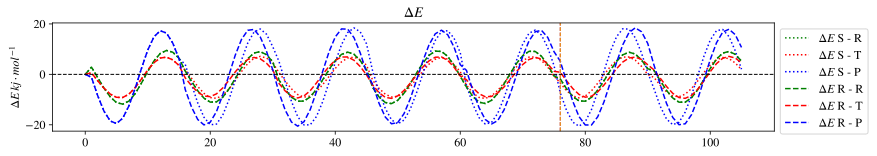

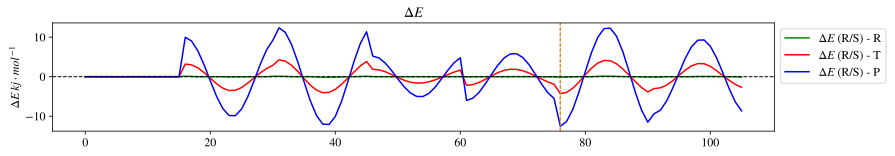

0.0


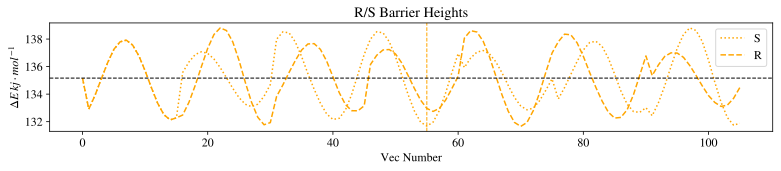

0.0


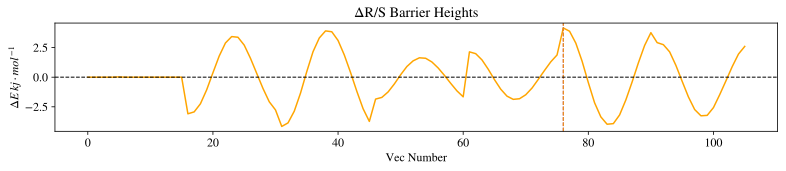

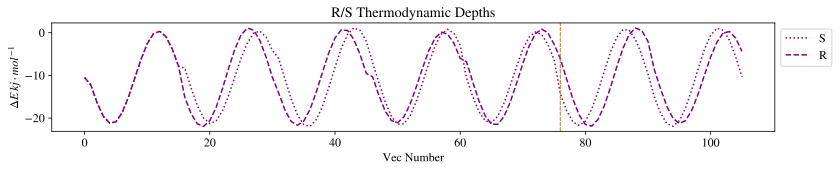

No handles with labels found to put in legend.


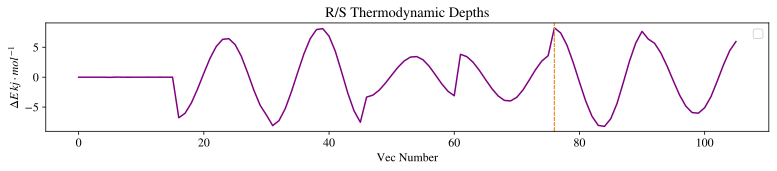

No handles with labels found to put in legend.


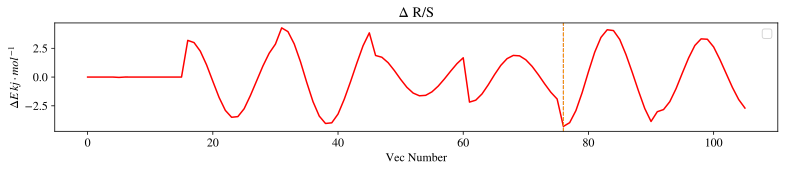

Best barrier vec - #55 : -0.00143726971, 0.00114306033, 0.000639913704
Best thermo vec - #94 : -0.000402108937, -0.00184951046, 0.000446587218
Best R/S kinetic vec - #76 : 0.0003376919410000001, -4.1355335464350695e-20, 0.00191514616
Best R/S thermodynamic vec - #76 : 0.0003376919410000001, -4.1355335464350695e-20, 0.00191514616
Best R/S simple - #31 : 0.00047046318299999993, -5.761512311776254e-20, -0.00188692477
Best simple catalytic - #64 : 0.0005306006250000001, -0.00184951046, 0.00028212535699999997


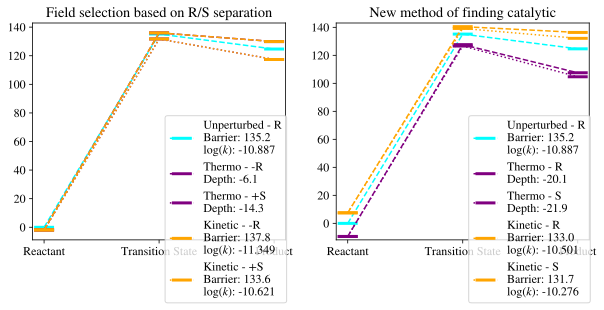

64


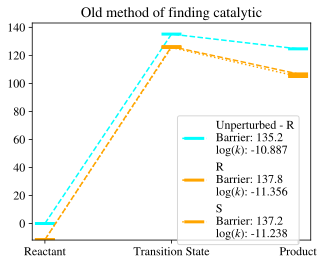

In [6]:
############################################## Load Data ##############################################
rcsvs = "data/rxn-traj/na1r-s-scan-1/efield_perturbation.csv"
tcsvs = "data/rxn-traj/na1t-s-scan-1/efield_perturbation.csv"
pcsvs = "data/rxn-traj/na1p-s-scan-1/efield_perturbation.csv"
rcsvr = "data/rxn-traj/na1r-r-scan-1/efield_perturbation.csv"
tcsvr = "data/rxn-traj/na1t-r-scan-1/efield_perturbation.csv"
pcsvr = "data/rxn-traj/na1p-r-scan-1/efield_perturbation.csv"
data = pd.DataFrame(columns=["vecx", "vecy", "vecz", "er", "et", "ep", "err", "etr", "epr"])

vec = []
er = []
et = []
ep = []
err = []
etr = []
epr = []

zeroes = [eh2kjmol(-709.096287554573), eh2kjmol(-709.044806086236), eh2kjmol(-709.048807322708)]

zeroes = np.subtract(zeroes, zeroes[0])

with open(rcsvs, "r") as f:
        reader = csv.reader(f)
        for i in reader:
            if i[0] != "x":
                vec += [[float(i[0]), float(i[1]), float(i[2])]]
                er += [float(i[3])]


with open(tcsvs, "r") as f:
        reader = csv.reader(f)
        for i in reader:
            if i[0] != "x":
                et += [float(i[3])]

with open(pcsvs, "r") as f:
        reader = csv.reader(f)
        for i in reader:
            if i[0] != "x":
                ep += [float(i[3])]
                
with open(rcsvr, "r") as f:
        reader = csv.reader(f)
        for i in reader:
            if i[0] != "x":
                err += [float(i[3])]


with open(tcsvr, "r") as f:
        reader = csv.reader(f)
        for i in reader:
            if i[0] != "x":
                etr += [float(i[3])]
                
                
with open(pcsvr, "r") as f:
        reader = csv.reader(f)
        for i in reader:
            if i[0] != "x":
                epr += [float(i[3])]
                
for i in range(len(vec)):
    az, el, r = cart2sph(vec[i][0], vec[i][1], vec[i][2])
    x, y, z = sph2cart(az, el, -r)
    try:
        data = data.append({"vecx": x, "vecy": y, "vecz": z, "rs": er[i], "ts": et[i], "ps": ep[i], "rr": err[i], "tr": etr[i], "pr": epr[i]}, ignore_index=True)
    except:
        pass
data['er'] = np.add(data['rs'], zeroes[0])
data['et'] = np.add(data['ts'], zeroes[1])
data['ep'] = np.add(data['ps'], zeroes[2])
data['err'] = np.add(data['rr'], zeroes[0])
data['etr'] = np.add(data['tr'], zeroes[1])
data['epr'] = np.add(data['pr'], zeroes[2])
    
data['rs_r'] = np.subtract(data['er'], data['err'])
data['rs_t'] = np.subtract(data['et'], data['etr'])
data['rs_p'] = np.subtract(data['ep'], data['epr'])

data['barrier'] = np.subtract(data['et'], data['er'])
data['thermo'] = np.subtract(data['ep'], data['et'])
data['barrier_r'] = np.subtract(data['etr'], data['err'])
data['thermo_r'] = np.subtract(data['epr'], data['etr'])

data['barrier_rs'] = np.subtract(data['barrier_r'], data['barrier'])
data['thermo_rs'] = np.subtract(data['thermo_r'], data['thermo'])

kbest = min(list(data.barrier))
tbest = min(list(data.thermo))
tsbest = max(list(data.rs_t))
cbest = min(list(data.et))

kbestindex = data.index[data['barrier'] == kbest]
tbestindex = data.index[data['thermo'] == tbest]
tsbestindex = data.index[data['rs_t'] == tsbest]
cbestindex = data.index[data['et'] == cbest]

rs_kbest = max(list(data.barrier_rs))
rs_tbest = max(list(data.thermo_rs))

rs_kbestindex = data.index[data['barrier_rs'] == rs_kbest]
rs_tbestindex = data.index[data['thermo_rs'] == rs_tbest]


maxvals = []
minvals = []
for i in ["er", "et", "ep", "err", "etr", "epr"]:
    maxvals += [max(list(data[i]))]
    minvals += [min(list(data[i]))]

############################################## R/S Separation ##############################################
x = list(range(0, len(data)))
fig, ax = plt.subplots(1,1, figsize=(13,2))
ax.plot(x, list(data.rs), linestyle=':', label="$\Delta E$ S - R", color="g")
ax.plot(x, list(data.ts), linestyle=':', label="$\Delta E$ S - T", color="r")
ax.plot(x, list(data.ps), linestyle=':', label="$\Delta E$ S - P", color="b")
ax.plot(x, list(data.rr), linestyle='--', label="$\Delta E$ R - R", color="g")
ax.plot(x, list(data.tr), linestyle='--', label="$\Delta E$ R - T", color="r")
ax.plot(x, list(data.pr), linestyle='--', label="$\Delta E$ R - P", color="b")
ax.axvline(rs_tbestindex, linewidth=1, linestyle='--', color="purple")
ax.axvline(rs_kbestindex, linewidth=1, linestyle='--', color="orange")
ax.axhline(0, linewidth=1, linestyle='--', color="k")
ax.set_title(r"$\Delta E$")
ax.set_ylabel(r"$\Delta E \:kj\cdot mol^{-1}$")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

x = list(range(0, len(data)))
fig, ax = plt.subplots(1,1, figsize=(13,2))
ax.plot(x, list(data.rs_r), label="$\Delta E$ (R/S) - R", color="g")
ax.plot(x, list(data.rs_t), label="$\Delta E$ (R/S) - T", color="r")
ax.plot(x, list(data.rs_p), label="$\Delta E$ (R/S) - P", color="b")
ax.axvline(rs_tbestindex, linewidth=1, linestyle='--', color="purple")
ax.axvline(rs_kbestindex, linewidth=1, linestyle='--', color="orange")
ax.axhline(0, linewidth=1, linestyle='--', color="k")
ax.set_title(r"$\Delta E$")
ax.set_ylabel(r"$\Delta E \:kj\cdot mol^{-1}$")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


fig, ax = plt.subplots(1,1, figsize=(13,2))
ax.plot(x, list(data.barrier), label="S", linestyle=":", color="orange")
ax.plot(x, list(data.barrier_r), label="R", linestyle="--",color="orange")
# ax.axvline(rs_tbestindex, linewidth=1, linestyle='--', color="purple")
ax.axvline(kbestindex, linewidth=1, linestyle='--', color="orange")
ax.axhline(list(data.barrier)[0], linewidth=1, linestyle='--', color="k")
print(zeroes[0])
ax.set_title(r"R/S Barrier Heights")
ax.set_xlabel("Vec Number")
ax.set_ylabel(r"$\Delta E \:kj\cdot mol^{-1}$")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()



fig, ax = plt.subplots(1,1, figsize=(13,2))
ax.plot(x, list(data.barrier_rs), color="orange")
ax.axvline(rs_tbestindex, linewidth=1, linestyle='--', color="purple")
ax.axvline(rs_kbestindex, linewidth=1, linestyle='--', color="orange")
ax.axhline(0, linewidth=1, linestyle='--', color="k")
print(zeroes[0])
ax.set_title(r"$\Delta$R/S Barrier Heights")
ax.set_xlabel("Vec Number")
ax.set_ylabel(r"$\Delta E \:kj\cdot mol^{-1}$")
plt.show()

fig, ax = plt.subplots(1,1, figsize=(13,2))
ax.plot(x, list(data.thermo), label="S", linestyle=":", color="purple")
ax.plot(x, list(data.thermo_r), label="R", linestyle="--", color="purple")
ax.axvline(rs_tbestindex, linewidth=1, linestyle='--', color="purple")
ax.axvline(rs_kbestindex, linewidth=1, linestyle='--', color="orange")
ax.set_title(r"R/S Thermodynamic Depths")
ax.set_xlabel("Vec Number")
ax.set_ylabel(r"$\Delta E \:kj\cdot mol^{-1}$")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

fig, ax = plt.subplots(1,1, figsize=(13,2))
ax.plot(x, list(data.thermo_rs), color="purple")
ax.axvline(rs_tbestindex, linewidth=1, linestyle='--', color="purple")
ax.axvline(rs_kbestindex, linewidth=1, linestyle='--', color="orange")
ax.set_title(r"R/S Thermodynamic Depths")
ax.set_xlabel("Vec Number")
ax.set_ylabel(r"$\Delta E \:kj\cdot mol^{-1}$")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

fig, ax = plt.subplots(1,1, figsize=(13,2))
ax.plot(x, list(data.rs_t), color="r")
ax.axvline(rs_tbestindex, linewidth=1, linestyle='--', color="purple")
ax.axvline(rs_kbestindex, linewidth=1, linestyle='--', color="orange")
ax.set_title(r"$\Delta$ R/S")
ax.set_xlabel("Vec Number")
ax.set_ylabel(r"$\Delta E \:kj\cdot mol^{-1}$")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()




vecnum = int(kbestindex.to_list()[0])
print("Best barrier vec - #{} : {}, {}, {}".format(vecnum, list(data.vecx)[vecnum], list(data.vecy)[vecnum], list(data.vecz)[vecnum]))
vecnum = int(tbestindex.to_list()[0])
print("Best thermo vec - #{} : {}, {}, {}".format(vecnum, list(data.vecx)[vecnum], list(data.vecy)[vecnum], list(data.vecz)[vecnum]))
vecnum = int(rs_kbestindex.to_list()[0])
print("Best R/S kinetic vec - #{} : {}, {}, {}".format(vecnum, list(data.vecx)[vecnum], list(data.vecy)[vecnum], list(data.vecz)[vecnum]))
vecnum = int(rs_tbestindex.to_list()[0])
print("Best R/S thermodynamic vec - #{} : {}, {}, {}".format(vecnum, list(data.vecx)[vecnum], list(data.vecy)[vecnum], list(data.vecz)[vecnum]))
vecnum = int(tsbestindex.to_list()[0])
print("Best R/S simple - #{} : {}, {}, {}".format(vecnum, list(data.vecx)[vecnum], list(data.vecy)[vecnum], list(data.vecz)[vecnum]))
vecnum = int(cbestindex.to_list()[0])
print("Best simple catalytic - #{} : {}, {}, {}".format(vecnum, list(data.vecx)[vecnum], list(data.vecy)[vecnum], list(data.vecz)[vecnum]))


x = ["Reactant", "Transition State", "Product"]

y1 = [list(data.er)[rs_tbestindex.tolist()[0]],list(data.et)[rs_tbestindex.tolist()[0]],list(data.ep)[rs_tbestindex.tolist()[0]]]
y2 = [list(data.er)[rs_kbestindex.tolist()[0]],list(data.et)[rs_kbestindex.tolist()[0]],list(data.ep)[rs_kbestindex.tolist()[0]]]
y3 = [list(data.err)[rs_tbestindex.tolist()[0]],list(data.etr)[rs_tbestindex.tolist()[0]],list(data.epr)[rs_tbestindex.tolist()[0]]]
y4 = [list(data.err)[rs_kbestindex.tolist()[0]],list(data.etr)[rs_kbestindex.tolist()[0]],list(data.epr)[rs_kbestindex.tolist()[0]]]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
# ax1.set_ylim(min(minvals),max(maxvals))
ax1.plot(x, zeroes, marker='_', markersize='20', linestyle='--', mew=3, label="Unperturbed - R\nBarrier: {}\n$\log(k)$: {}".format(round(zeroes[1]-zeroes[0], 1), e2logk(zeroes[0], zeroes[1])), color="cyan")
ax1.plot(x, y3, marker='_', markersize='20', linestyle='--', mew=3, label="Thermo - -R\nDepth: {}".format(round(list(data.thermo_r)[rs_tbestindex.tolist()[0]], 1)), color="purple")
ax1.plot(x, y1, marker='_', markersize='20', linestyle=':', mew=3, label="Thermo - +S\nDepth: {}".format(round(list(data.thermo)[rs_tbestindex.tolist()[0]], 1)), color="purple")
ax1.plot(x, y4, marker='_', markersize='20', linestyle='--', mew=3, label="Kinetic - -R\nBarrier: {}\n$\log(k)$: {}".format(round(list(data.barrier_r)[rs_kbestindex.tolist()[0]], 1), e2logk(y4[0], y4[1])), color="orange")
ax1.plot(x, y2, marker='_', markersize='20', linestyle=':', mew=3, label="Kinetic - +S\nBarrier: {}\n$\log(k)$: {}".format(round(list(data.barrier)[rs_kbestindex.tolist()[0]], 1), e2logk(y2[0], y2[1])), color="orange")

ax1.legend(bbox_to_anchor=(0.5, 0.6))
ax1.set_title("Field selection based on R/S separation")



y5 = [list(data.er)[tbestindex.tolist()[0]],list(data.et)[tbestindex.tolist()[0]],list(data.ep)[tbestindex.tolist()[0]]]
y6 = [list(data.er)[kbestindex.tolist()[0]],list(data.et)[kbestindex.tolist()[0]],list(data.ep)[kbestindex.tolist()[0]]]
y7 = [list(data.err)[tbestindex.tolist()[0]],list(data.etr)[tbestindex.tolist()[0]],list(data.epr)[tbestindex.tolist()[0]]]
y8 = [list(data.err)[kbestindex.tolist()[0]],list(data.etr)[kbestindex.tolist()[0]],list(data.epr)[kbestindex.tolist()[0]]]
ax2.set_ylim(min(minvals),max(maxvals))
ax2.plot(x, zeroes, marker='_', markersize='20', linestyle='--', mew=3, label="Unperturbed - R\nBarrier: {}\n$\log(k)$: {}".format(round(zeroes[1]-zeroes[0], 1), e2logk(zeroes[0], zeroes[1])), color="cyan")
ax2.plot(x, y7, marker='_', markersize='20', linestyle='--', mew=3, label="Thermo - R\nDepth: {}".format(round(list(data.thermo_r)[tbestindex.tolist()[0]], 1)), color="purple")
ax2.plot(x, y5, marker='_', markersize='20', linestyle=':', mew=3, label="Thermo - S\nDepth: {}".format(round(list(data.thermo)[tbestindex.tolist()[0]], 1)), color="purple")
ax2.plot(x, y8, marker='_', markersize='20', linestyle='--', mew=3, label="Kinetic - R\nBarrier: {}\n$\log(k)$: {}".format(round(list(data.barrier_r)[kbestindex.tolist()[0]], 1), e2logk(y8[0], y8[1])), color="orange")
ax2.plot(x, y6, marker='_', markersize='20', linestyle=':', mew=3, label="Kinetic - S\nBarrier: {}\n$\log(k)$: {}".format(round(list(data.barrier)[kbestindex.tolist()[0]], 1), e2logk(y6[0], y6[1])), color="orange")
ax2.legend(bbox_to_anchor=(0.5, 0.6))
ax2.set_title("New method of finding catalytic")
plt.show()

fig, ax1 = plt.subplots(1,1, figsize=(5,4))
vecnum = int(cbestindex.to_list()[0])
print(vecnum)
y1 = [list(data.er)[vecnum],list(data.et)[vecnum],list(data.ep)[vecnum]]
y2 = [list(data.err)[vecnum],list(data.etr)[vecnum],list(data.epr)[vecnum]]
ax1.set_ylim(min(minvals),max(maxvals))
ax1.plot(x, zeroes, marker='_', markersize='20', linestyle='--', mew=3, label="Unperturbed - R\nBarrier: {}\n$\log(k)$: {}".format(round(zeroes[1]-zeroes[0], 1), e2logk(zeroes[0], zeroes[1])), color="cyan")
ax1.plot(x, y2, marker='_', markersize='20', linestyle='--', mew=3, label="R\nBarrier: {}\n$\log(k)$: {}".format(round(list(data.barrier_r)[vecnum], 1), e2logk(y2[0], y2[1])), color="orange")
ax1.plot(x, y1, marker='_', markersize='20', linestyle=':', mew=3, label="S\nBarrier: {}\n$\log(k)$: {}".format(round(list(data.barrier)[vecnum], 1), e2logk(y1[0], y1[1])), color="orange")
ax1.legend(bbox_to_anchor=(0.5, 0.6))
ax1.set_title("Old method of finding catalytic")
plt.show()

rs = [ list(data.err)[rs_kbestindex.tolist()[0]], list(data.er)[rs_kbestindex.tolist()[0]]]
rs = np.subtract(rs, min(rs))

In [7]:
def plotvalue(val):
    fig = px.scatter_3d(data, x="vecx", y="vecz", z="vecy", color=val)
    fig.show()
interact(plotvalue,
        val=widgets.Dropdown(options=list(data))
        )

interactive(children=(Dropdown(description='val', options=('vecx', 'vecy', 'vecz', 'er', 'et', 'ep', 'err', 'e…

<function __main__.plotvalue(val)>

In [8]:
maxvals = []
minvals = []
for i in ["er", "et", "ep", "err", "etr", "epr"]:
    maxvals += [max(list(data[i]))]
    minvals += [min(list(data[i]))]
        
def plotspecificvec(vec):
    x = list(range(0, len(data)))
    fig, ax = plt.subplots(1,1, figsize=(13,2))
    ax.plot(x, list(data.rs), label="$\Delta E$ - R - R", linestyle='-', color="r")
    ax.plot(x, list(data.ts), label="$\Delta E$ - T - R", linestyle=':', color="r")
    ax.plot(x, list(data.ps), label="$\Delta E$ - P - R", linestyle='-.', color="r")
    ax.plot(x, list(data.rr), label="$\Delta E$ - R - S", linestyle='-', color="b")
    ax.plot(x, list(data.tr), label="$\Delta E$ - T - S", linestyle=':', color="b")
    ax.plot(x, list(data.pr), label="$\Delta E$ - P - S", linestyle='-.', color="b")
    ax.axvline(rs_tbestindex, linewidth=1, linestyle='--', color="purple")
    ax.axvline(rs_kbestindex, linewidth=1, linestyle='--', color="orange")
    ax.axvline(vec, linewidth=1.2, linestyle='-', color="k")
    ax.axhline(0, linewidth=1, linestyle='--', color="k")
    ax.set_title(r"$\Delta E$")
    ax.set_ylabel(r"$\Delta E \:kj\cdot mol^{-1}$")
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()
    
    
    x = ["Reactant", "Transition State", "Product"]

    y1 = [list(data.er)[vec],list(data.et)[vec],list(data.ep)[vec]]
    y2 = [list(data.err)[vec],list(data.etr)[vec],list(data.epr)[vec]]
    fig, ax1 = plt.subplots(1,1, figsize=(6,4))
    ax1.set_ylim(min(minvals)-10,max(maxvals)+10)
    ax1.plot(x, y1, marker='_', markersize='20', linestyle='--', mew=3, label="S", color="b")
    ax1.plot(x, y2, marker='_', markersize='20', linestyle='--', mew=3, label="R", color="r")
    fig.legend(bbox_to_anchor=(1.1, 0.8))
    plt.show()
    print(list(data.et)[vec]-list(data.etr)[vec])
    print(list(data.et)[vec]-list(data.er)[vec], list(data.etr)[vec]-list(data.err)[vec])


interact(plotspecificvec,
        vec=widgets.IntSlider(value=0, min=0, max=len(list(data.rs_p))-1),
        )

interactive(children=(IntSlider(value=0, description='vec', max=105), Output()), _dom_classes=('widget-interac…

<function __main__.plotspecificvec(vec)>